## @Mohammed Ombadi (ombadi@lbl.gov) _ Nature 2023, Ombadi et al. "A warming-induced reduction in snow fraction amplifies rainfall extremes"

### This notebook includes a function to calculate Annual Maximum Series Data from input data of rainfall for any arbitrary temporal resolution (e.g., 1-, 3-, 12-hours). The notebook also contains a demonstration of the calculation applied on sample data from CMIP6 data.

## Import Libraries

In [1]:
# Basic libraries
import os
import glob
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Other
import netCDF4 as nc
import calendar
 
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

## Function to Extract AMS

In [2]:
def extract_ams(data, year_start, dur= [3, 12, 24], dt= 3):
    
    # Input:
     # data: 3d-array of precipitation (rainfall) data with size = lat*lon*number of data points
     # dur: duration for which AMS will be computed in units of hours
     # dt: The temporal resolution of the data in units of hours
        
    # Output:
     # ams: 4d-array of annual maximum series data with size = lat*lon*duration of rainfall*years
        
    ## --------------------------------------------------------------------------------------------- ##
    
    # number of years in data
    n_years = int(data.shape[2]/(365* (24/dt)))
    
    # Pre-allocate an array to save ams data
    ams = np.zeros((data.shape[0],data.shape[1],len(dur),n_years))
    
    # Iterate over years to extract AMS for each duration of interest
    begin = 0 # initialize index to read data
    for y in range(n_years):
        
        year = year_start + y
        n = int(((365 + (1*calendar.isleap(year))) * 24) / dt) # number of data samples in year y
        d = data[:,:,begin:(begin+n)] # data for year y
        begin = begin + n # update the index for reading the data
        
        
        # Iterate over durations in "dur"
        for i in range(len(dur)):
            
            duration = dur[i]
            
            # Accumulate data to the respective duration
            d_duration = np.zeros((d.shape[0], d.shape[1], d.shape[2]-duration))
            for j in range(d.shape[2]-duration):
                d_duration[:,:,j] = np.nansum(d[:,:,j:(j+duration-1)], axis= 2) 
                
            # Extract AMS
            ams[:,:,i,y] = np.nanmax(d_duration, axis= 2)
            
    return ams
 

## Example of applying function to extract AMS from sample data "rainfall_BCC-CSM2-MR_historical_r1i1p1f1_195001010130-195212312230"

In [3]:
d = nc.Dataset('./Raw data/CMIP6_sample_data/rainfall_BCC-CSM2-MR_historical_r1i1p1f1_195001010130-195212312230.nc')
data = d['data'][:]
data = np.transpose(data, (2,1,0)) # Transpose to (lat*lon*time); 
data[data==-999] = np.nan # Replace fill-in value of missing data with Nans
data.shape

(80, 320, 8760)

In [4]:
ams = extract_ams(data, 1950, dur= [3, 12, 24], dt= 3)
ams.shape

(80, 320, 3, 3)

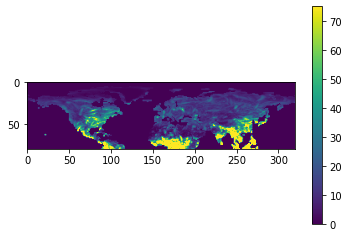

In [5]:
plt.imshow(ams[:,:,0,1], vmin=0, vmax=75)
plt.colorbar()